In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_theme(style='whitegrid')

In [140]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [141]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [142]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [143]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [144]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [145]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [146]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


EDA on Customers dataset

In [147]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')

Text(0, 0.5, 'Number of Signups')

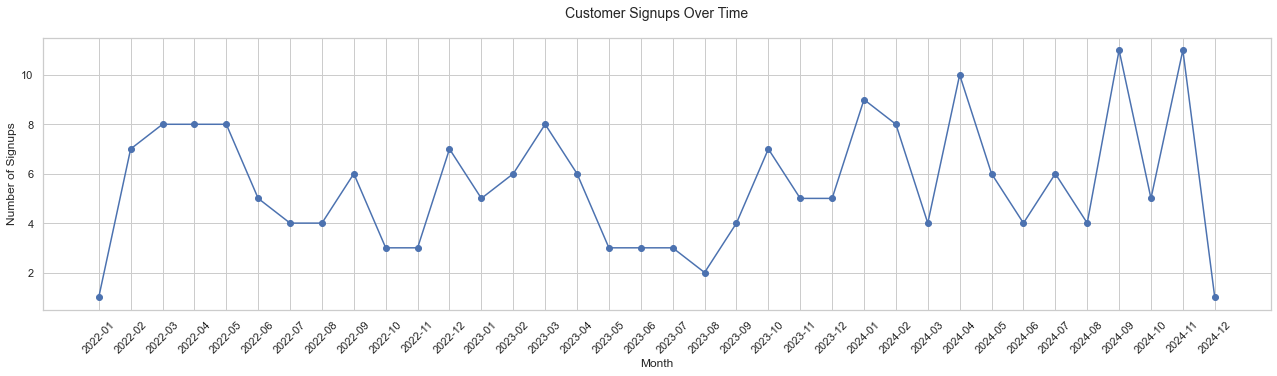

In [148]:
#Visualising number of signups over time

monthly_signups = customers.groupby(customers['SignupDate'].dt.to_period('M')).size().reset_index()
monthly_signups.columns = ['Month', 'Number_of_Signups']
monthly_signups['Month'] = monthly_signups['Month'].astype(str)

plt.figure(figsize=(22, 5))
plt.plot(monthly_signups['Month'], monthly_signups['Number_of_Signups'],marker='o')
plt.title('Customer Signups Over Time', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Number of Signups', fontsize=12)

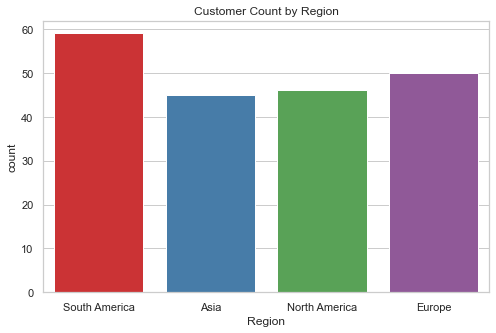

In [149]:
#Visualising number of customers by region

plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='Set1')
plt.title('Customer Count by Region')
plt.show()

<Figure size 1584x432 with 0 Axes>

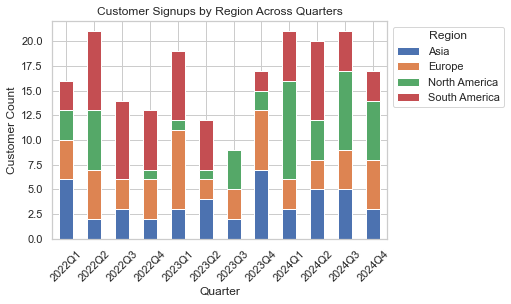

In [155]:
# Visulising number of new customer signups over time by region

customers['SignupQuarter'] = customers['SignupDate'].dt.to_period('Q')
region_quarterly = customers.groupby(['Region', 'SignupQuarter'])['CustomerID'].count().reset_index()

# Pivoting the data
region_quarterly_pivot = region_quarterly.pivot(index='SignupQuarter', columns='Region', values='CustomerID')

plt.figure(figsize=(22, 6))
region_quarterly_pivot.plot(kind='bar', stacked=True)
plt.title('Customer Signups by Region Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


EDA on Products dataset

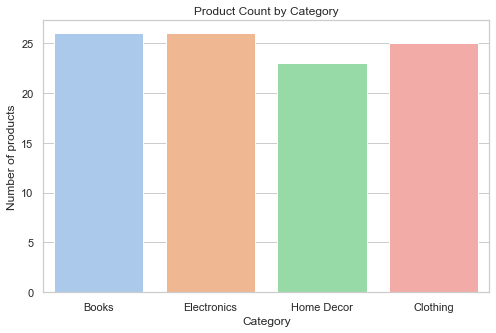

In [158]:
# Visualising number of products per category

plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='pastel')
plt.title('Product Count by Category')
plt.ylabel('Number of products')
plt.show()


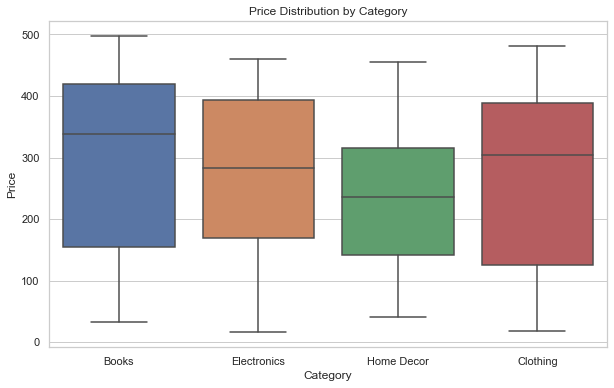

In [161]:
# Viualising price distribution of products by category

plt.figure(figsize=(10, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.show()

EDA on Transactions dataset

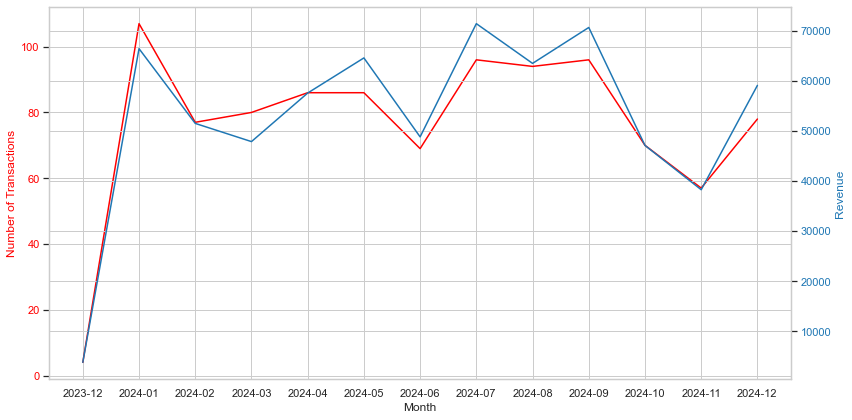

In [184]:
# Visualising and comparing number of transactions and revenue generated over each month

monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.strftime('%Y-%m'))\
    .agg({'TotalValue': 'sum', 'TransactionID': 'count'})\
    .reset_index()
monthly_sales.columns = ['Month', 'Revenue', 'Number_of_Transactions']

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Transactions', color='red')
ax1.plot(monthly_sales['Month'], monthly_sales['Number_of_Transactions'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Revenue', color=color) 
ax2.plot(monthly_sales['Month'], monthly_sales['Revenue'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


plt.show()

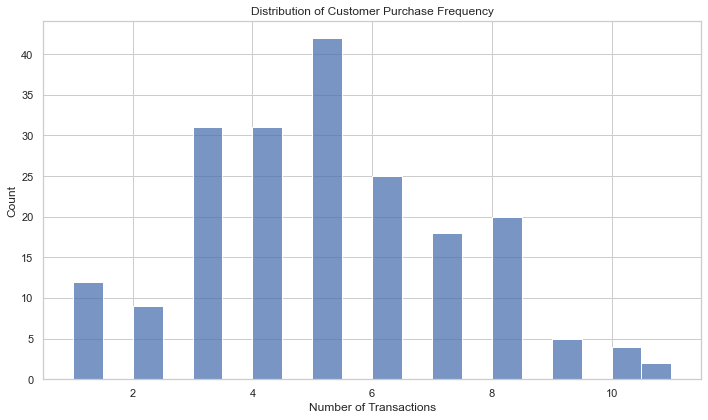

In [195]:
# Visualising frequency of customers

plt.figure(figsize=(10, 6))
sns.histplot(data=transactions, x=transactions.groupby('CustomerID')['CustomerID'].count(), bins=20)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.tight_layout()

EDA on all 3 datasets joined

In [94]:
# Merge transactions with customers and products
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

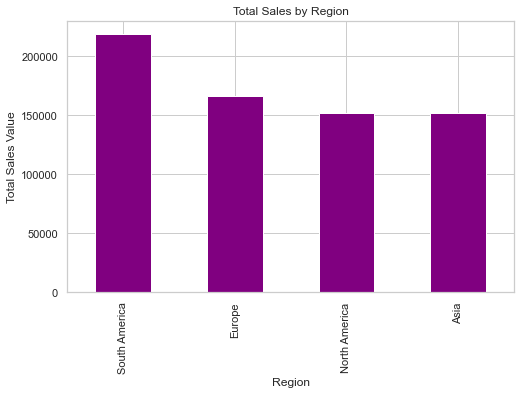

In [95]:
regional_sales = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
regional_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales Value')
plt.show()


In [212]:
# Analysing performance of each category of products

category_metrics = merged.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count'
}).round(2)

category_metrics.columns= ['Total Revenue', 'Average Revenue', 'Number of Transactions']

category_metrics

,Total Revenue,Average Revenue,Number of Transactions
Category,,,
Books,192147.47,711.66,270
Clothing,166170.66,728.82,228
Electronics,180783.50,711.75,254
Home Decor,150893.93,608.44,248


In [209]:
# Analysing performance of each region

regional_metrics = merged.groupby('Region').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count',
    'CustomerID': 'nunique'
}).round(2)

regional_metrics.columns= ['Total Revenue', 'Average Revenue', 'Number of Transactions', 'Number of Customers']
regional_metrics

,Total Revenue,Average Revenue,Number of Transactions,Number of Customers
Region,,,,
Asia,152074.97,697.59,218,44
Europe,166254.63,710.49,234,50
North America,152313.40,624.24,244,46
South America,219352.56,721.55,304,59
